## Dataset ===>> https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv(
    "./../data/raw/Household Electric Power Consumption/household_power_consumption.txt", 
    sep=';', 
    parse_dates={'dt': ['Date', 'Time']},  # Combine Date and Time into a single datetime column
    infer_datetime_format=True,            # Automatically infer the datetime format
    na_values=['nan', '?'],                # Treat 'nan' and '?' as missing values
    low_memory=False                        # Prevent memory optimization issues
)


In [3]:
data.head()

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   dt                     datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [5]:
data.shape

(2075259, 8)

In [6]:
data.describe()

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-06 07:12:59.999994112,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


In [7]:
data.columns

Index(['dt', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [8]:
# Find columns with NaN values
dropping_list_all = [col for col in data.columns if data[col].isnull().any()]

# Display the list of columns with NaN values
print(dropping_list_all)


['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


In [9]:
# Fill NaN values with the mean for all numeric columns
data.fillna(data.mean(), inplace=True)

In [10]:
data.isnull().sum()

dt                       0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
# Resample data on a daily basis using the 'dt' column
data_resample = data.resample('D', on='dt').sum()

# Rename the 'Global_active_power' column to 'y'
data_resample.rename(columns={"Global_active_power": "y"}, inplace=True)

# Keep only the 'y' column
data_resample = data_resample[['y']]

# Display the first few rows
print(data_resample.head())

                   y
dt                  
2006-12-16  1209.176
2006-12-17  3390.460
2006-12-18  2203.826
2006-12-19  1666.194
2006-12-20  2225.748


## Data visualization

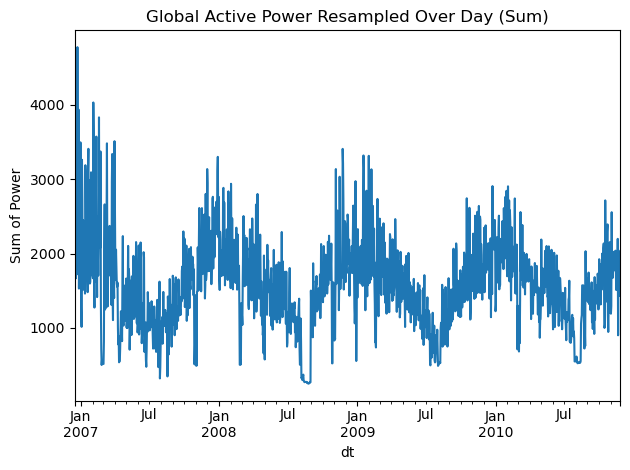

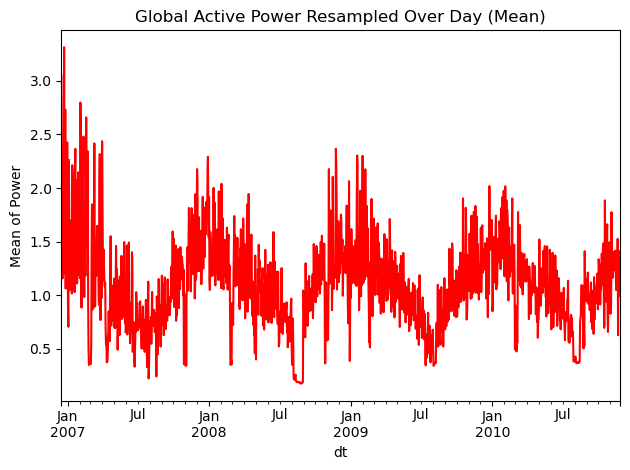

In [12]:
# Ensure 'dt' column is set as the index
data.set_index('dt', inplace=True)

# Plotting sum of Global_active_power resampled daily
data['Global_active_power'].resample('D').sum().plot(
    title='Global Active Power Resampled Over Day (Sum)', ylabel='Sum of Power'
)
plt.tight_layout()
plt.show()

# Plotting mean of Global_active_power resampled daily
data['Global_active_power'].resample('D').mean().plot(
    title='Global Active Power Resampled Over Day (Mean)', color='red', ylabel='Mean of Power'
)
plt.tight_layout()
plt.show()


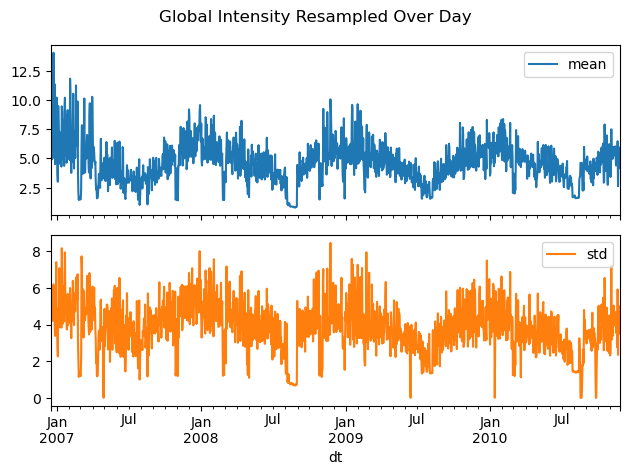

In [13]:
# Resampling and calculating mean and standard deviation of 'Global_intensity' over days
r = data['Global_intensity'].resample('D').agg(['mean', 'std'])

# Plotting mean and std in separate subplots
r.plot(subplots=True, title='Global Intensity Resampled Over Day', layout=(2,1))
plt.tight_layout()
plt.show()

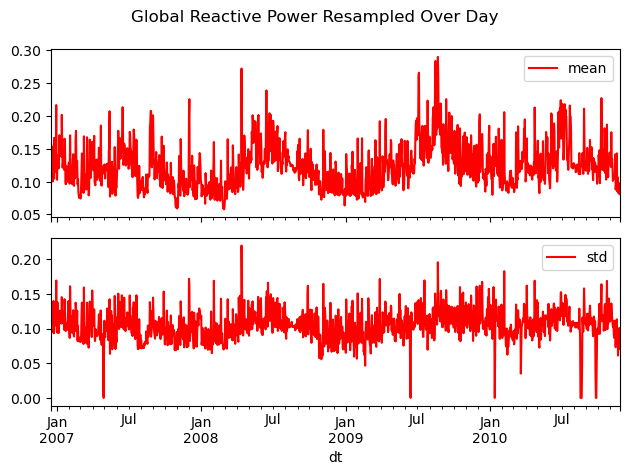

In [14]:
# Resampling and calculating mean and standard deviation of 'Global_reactive_power' over days
r2 = data['Global_reactive_power'].resample('D').agg(['mean', 'std'])

# Plotting mean and std in separate subplots with red color
r2.plot(subplots=True, title='Global Reactive Power Resampled Over Day', color='red', layout=(2, 1))
plt.tight_layout()
plt.show()

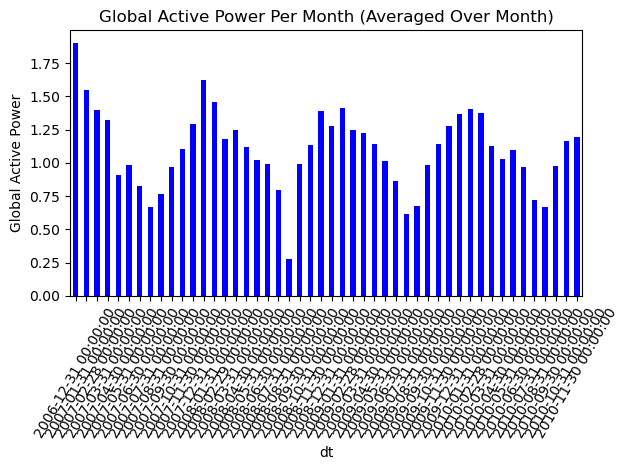

In [15]:
# Plotting the mean of 'Global_active_power' resampled over month as a bar chart
data['Global_active_power'].resample('M').mean().plot(kind='bar', color='blue')

# Formatting the plot
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Global Active Power Per Month (Averaged Over Month)')
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()

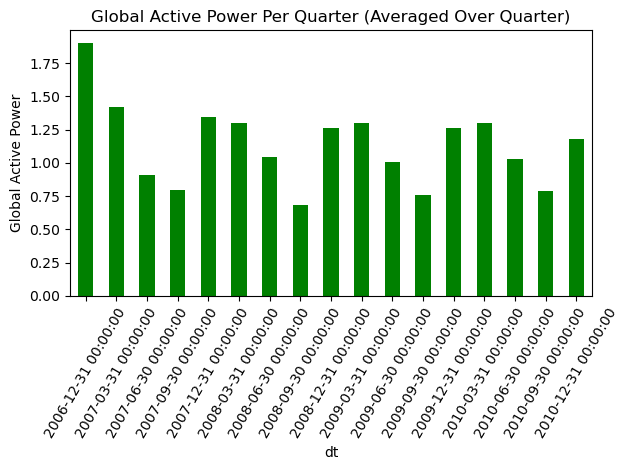

In [16]:
# Plotting the mean of 'Global_active_power' resampled over quarters as a bar chart
data['Global_active_power'].resample('Q').mean().plot(kind='bar', color='green')

# Formatting the plot
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Global Active Power Per Quarter (Averaged Over Quarter)')
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()

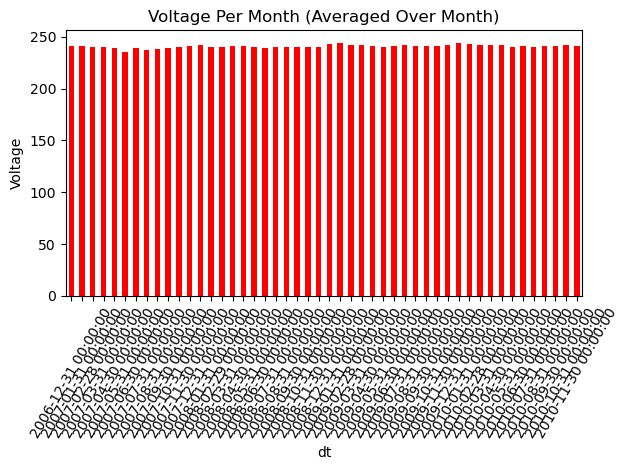

In [17]:
# Plotting the mean of 'Voltage' resampled over months as a bar chart
data['Voltage'].resample('M').mean().plot(kind='bar', color='red')

# Formatting the plot
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage Per Month (Averaged Over Month)')
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()

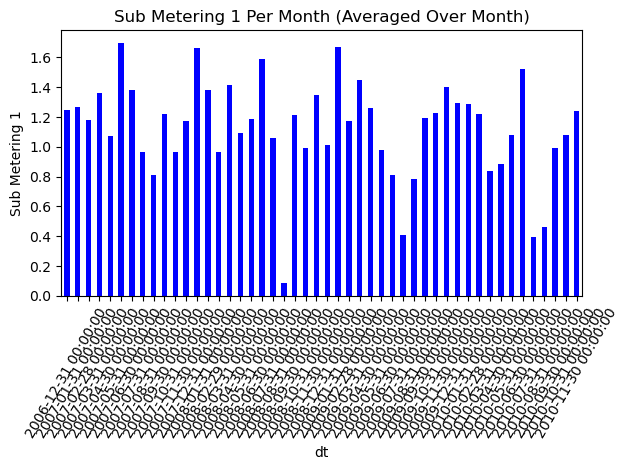

In [18]:
# Plotting the mean of 'Sub_metering_1' resampled over months as a bar chart
data['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='blue')

# Formatting the plot
plt.xticks(rotation=60)
plt.ylabel('Sub Metering 1')
plt.title('Sub Metering 1 Per Month (Averaged Over Month)')
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()

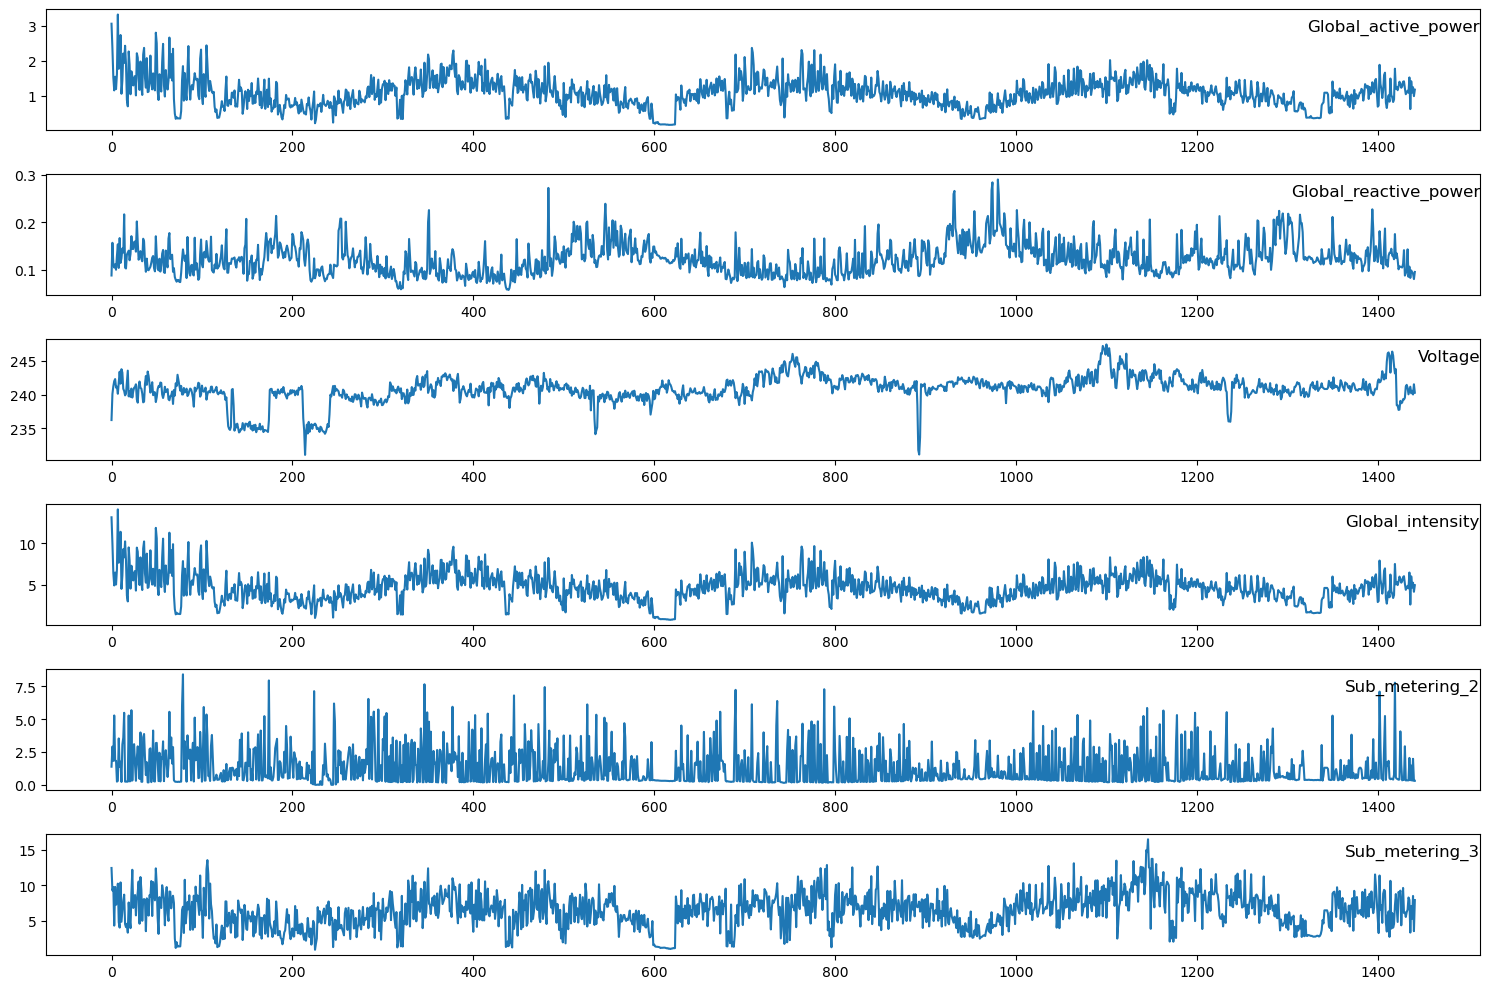

In [19]:
# Specify columns to plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups = cols
values = data.resample('D').mean().values

# Plot each selected column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(data.columns[group], y=0.75, loc='right')
    i += 1

plt.tight_layout()  # Adjust layout to prevent overlapping of subplots
plt.show()

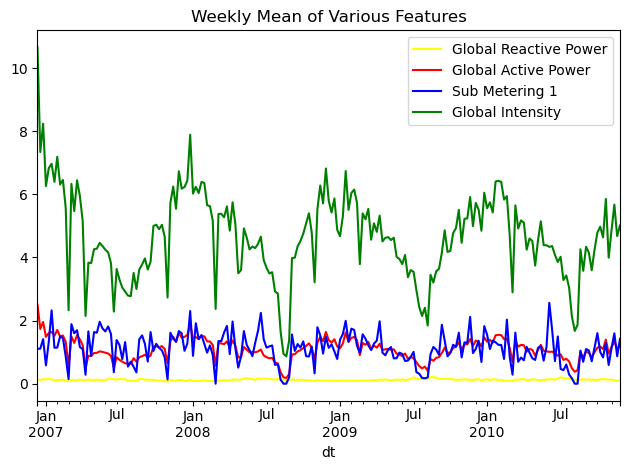

In [20]:
# Resampling over week and computing the mean for multiple columns
data['Global_reactive_power'].resample('W').mean().plot(color='yellow', label='Global Reactive Power', legend=True)
data['Global_active_power'].resample('W').mean().plot(color='red', label='Global Active Power', legend=True)
data['Sub_metering_1'].resample('W').mean().plot(color='blue', label='Sub Metering 1', legend=True)
data['Global_intensity'].resample('W').mean().plot(color='green', label='Global Intensity', legend=True)

# Showing the plot
plt.title('Weekly Mean of Various Features')
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout for clarity
plt.show()

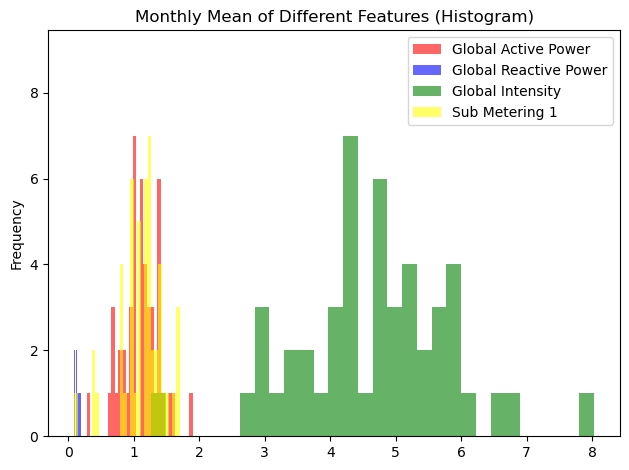

In [21]:
# Plotting histograms of the mean of different features resampled over month
data['Global_active_power'].resample('M').mean().plot(kind='hist', color='red', legend=True, alpha=0.6, bins=30, label='Global Active Power')
data['Global_reactive_power'].resample('M').mean().plot(kind='hist', color='blue', legend=True, alpha=0.6, bins=30, label='Global Reactive Power')
data['Global_intensity'].resample('M').mean().plot(kind='hist', color='green', legend=True, alpha=0.6, bins=30, label='Global Intensity')
data['Sub_metering_1'].resample('M').mean().plot(kind='hist', color='yellow', legend=True, alpha=0.6, bins=30, label='Sub Metering 1')

# Formatting the plot
plt.title('Monthly Mean of Different Features (Histogram)')
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

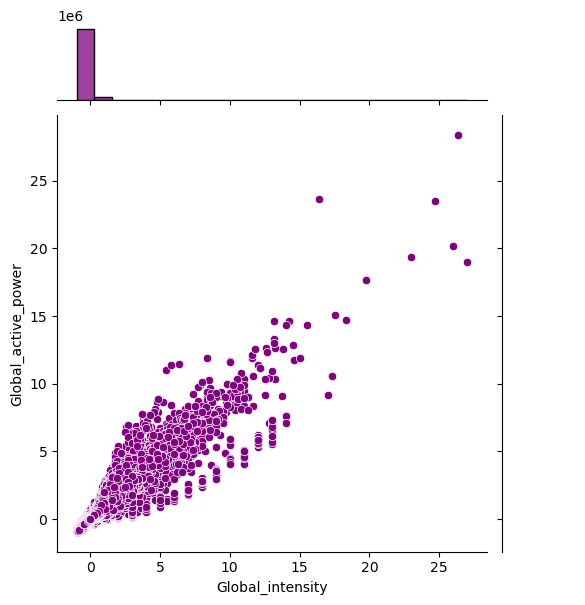

In [22]:
# Calculating percentage change for the data
data_returns = data.pct_change()

# Plotting the joint plot between 'Global_intensity' and 'Global_active_power' for percentage change
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns, kind='scatter', color='purple')

# Display the plot
plt.show()

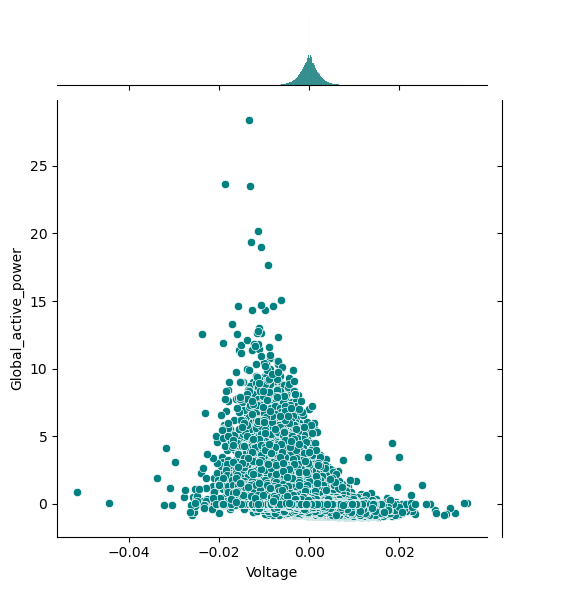

In [23]:
# Plotting the correlation between 'Voltage' and 'Global_active_power' for percentage change
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns, kind='scatter', color='teal')

# Display the plot
plt.show()

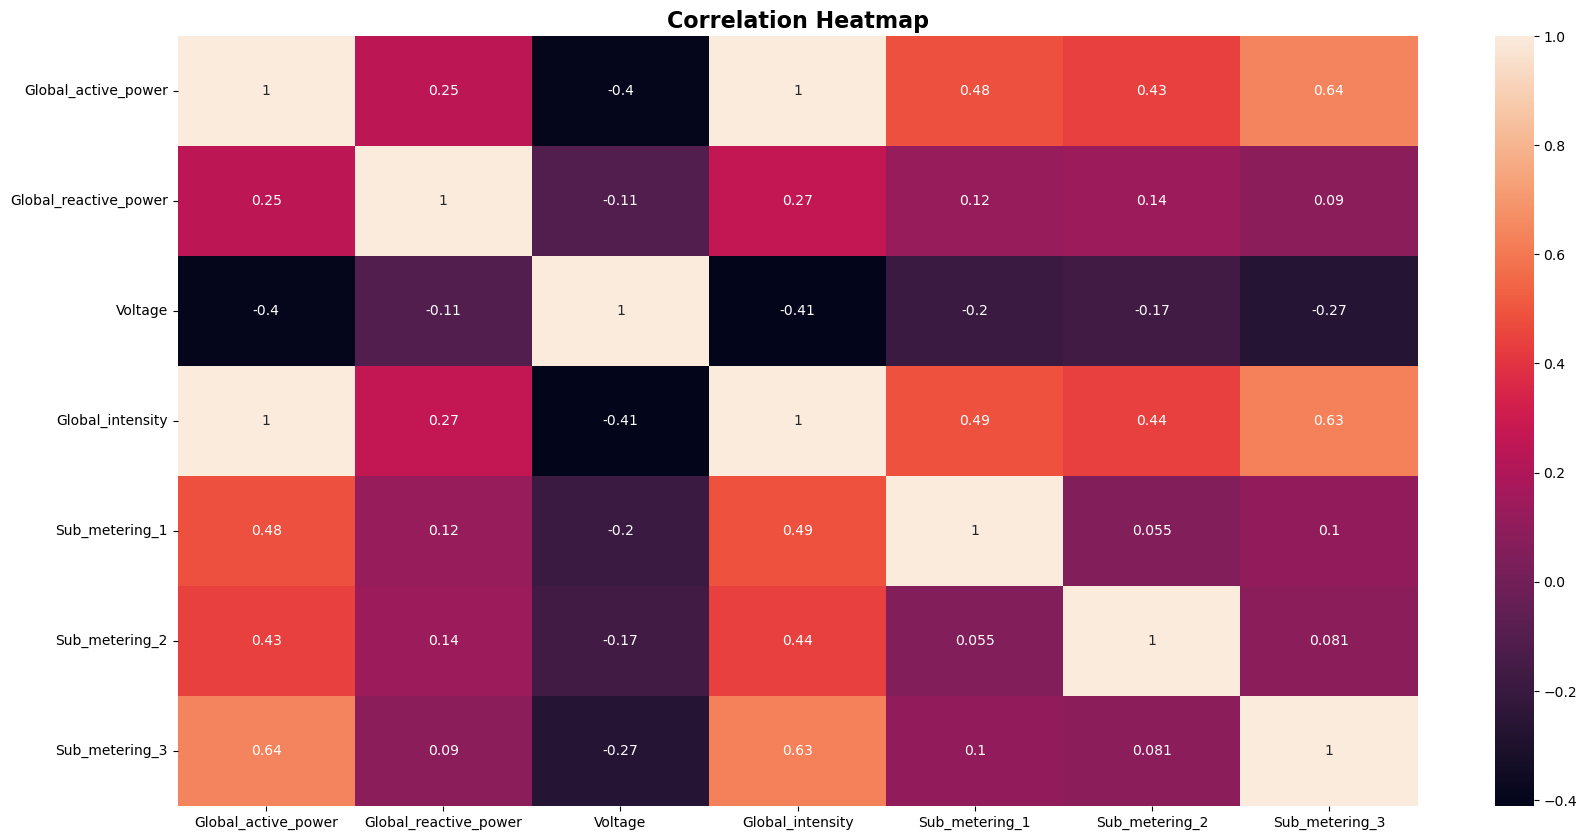

In [24]:
## Correlation heatmap with annotations
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Heatmap", fontsize=16, fontweight="bold")
plt.show()

## Data Pre-processing

In [25]:
def create_lags(data, days=7):
    """
    Create lagged features for the 'y' column in the data.
    """
    for lag in range(1, days + 1):
        data[f"Lag_{lag}"] = data['y'].shift(lag)
    return data


def create_features(data, time_steps=1, n_features=7):
    """
    Create a 3D dataset for model input.
    """
    cols, names = [], []

    for step in range(1, time_steps + 1):
        cols.append(data.shift(-step))
        names += [f"{col}_{step}" for col in data.columns]

    # Combine the columns and drop NaN values
    aggregated = pd.concat(cols, axis=1)
    aggregated.columns = names
    aggregated.dropna(inplace=True)

    # Reshape to 3D (samples, time_steps, n_features)
    aggregated = aggregated.values.reshape(aggregated.shape[0], time_steps, n_features)
    return aggregated


def create_dataset(data, yhat):
    """
    Create a new dataset with predictions added to the original data.
    """
    # Ensure yhat is a DataFrame
    predictions = pd.DataFrame(yhat.flatten(), columns=['y'])
    
    # Concatenate original data and predictions
    combined = pd.concat([data.iloc[:, 0], predictions], axis=0)
    combined.columns = ['y']

    # Create a date index starting from '2006-12-23'
    date_idx = pd.date_range(start='2006-12-23', periods=combined.shape[0])
    combined.set_index(date_idx, inplace=True)

    return combined


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the resampled data
chosen_data = data_resample.copy()

# Add lagged features
chosen_data = create_lags(chosen_data)

# Drop rows with NaN values created by the lagging process
chosen_data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Fit the scalers on the training data (first 1096 samples) to prevent data leakage
scaler_x.fit(chosen_data.iloc[:1096, 1:])
scaler_y.fit(chosen_data.iloc[:1096, 0].values.reshape(-1, 1))

# Transform the features (X) and target (y)
x_scaled = scaler_x.transform(chosen_data.iloc[:, 1:])
y_scaled = scaler_y.transform(chosen_data[['y']])

# Combine the scaled features and target into a single DataFrame
scaled_data = np.hstack((x_scaled, y_scaled))
scaled_data = pd.DataFrame(scaled_data, index=chosen_data.index, columns=chosen_data.columns)

# Display the shape and first few rows
print(scaled_data.shape)
scaled_data.head()


(1435, 8)


,y,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
dt,,,,,,,,
2006-12-23,0.462304,0.324670,0.436748,0.313037,0.431901,0.694252,0.211996,1.000000
2006-12-24,1.000000,0.462304,0.324670,0.436748,0.313037,0.431901,0.694252,0.508439
2006-12-25,0.508439,1.000000,0.462304,0.324670,0.436748,0.313037,0.431901,0.551133
2006-12-26,0.551133,0.508439,1.000000,0.462304,0.324670,0.436748,0.313037,0.814446
2006-12-27,0.814446,0.551133,0.508439,1.000000,0.462304,0.324670,0.436748,0.282652


## Model Building

In [27]:
# Split the scaled data into training, validation, and test sets
train_data = scaled_data[:1096]
val_data = scaled_data[1096:1256]
test_data = scaled_data[1256:]

# Separate features (X) and target (y) for each split
x_train = train_data.drop(columns=["y"])
y_train = train_data["y"]

x_val = val_data.drop(columns=["y"])
y_val = val_data["y"]

x_test = test_data.drop(columns=["y"])
y_test = test_data["y"]

# Display shapes for confirmation
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (1096, 7), y_train shape: (1096,)
x_val shape: (160, 7), y_val shape: (160,)
x_test shape: (179, 7), y_test shape: (179,)


In [28]:
# Create 3D datasets for training, validation, and testing
x_train_np = create_features(x_train, time_steps=7, n_features=7)
x_val_np = create_features(x_val, time_steps=7, n_features=7)
x_test_np = create_features(x_test, time_steps=7, n_features=7)

# Align target (y) with the adjusted feature lengths to ensure proper shape matching
y_train = y_train.iloc[:x_train_np.shape[0]]
y_val = y_val.iloc[:x_val_np.shape[0]]
y_test = y_test.iloc[:x_test_np.shape[0]]

# Optionally display shapes for confirmation
print(f"x_train_np shape: {x_train_np.shape}, y_train shape: {y_train.shape}")
print(f"x_val_np shape: {x_val_np.shape}, y_val shape: {y_val.shape}")
print(f"x_test_np shape: {x_test_np.shape}, y_test shape: {y_test.shape}")

x_train_np shape: (1089, 7, 7), y_train shape: (1089,)
x_val_np shape: (153, 7, 7), y_val shape: (153,)
x_test_np shape: (172, 7, 7), y_test shape: (172,)


### Forecasting with Recurrent Neural Networks

In [29]:
def fit_model(model_type, units, x_train_np, y_train, x_val_np, y_val, epochs=50, batch_size=70, dropout_rate=0.2, verbose=False):
    """
    Builds and fits a sequential model using the given model type (e.g., LSTM or GRU).
    """
    model = Sequential()
    
    # First RNN layer with return_sequences=True to stack additional layers
    model.add(model_type(units=units, return_sequences=True, input_shape=(x_train_np.shape[1], x_train_np.shape[2])))
    
    # Optionally add dropout for regularization
    model.add(Dropout(dropout_rate))
    
    # Second RNN layer without return_sequences
    model.add(model_type(units=units))
    
    # Another dropout layer (optional)
    model.add(Dropout(dropout_rate))
    
    # Dense layer for final output
    model.add(Dense(units=1))
    
    # Compile the model
    model.compile(loss='mse', optimizer='adam')
    
    # Fit the model
    history = model.fit(
        x_train_np, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val_np, y_val),
        verbose=verbose,
        shuffle=False
    )
    
    return model


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Fit models with different RNN architectures
RNN_model = fit_model(SimpleRNN, units=64, x_train_np=x_train_np, y_train=y_train, x_val_np=x_val_np, y_val=y_val)
LSTM_model = fit_model(LSTM, units=64, x_train_np=x_train_np, y_train=y_train, x_val_np=x_val_np, y_val=y_val)
GRU_model = fit_model(GRU, units=64, x_train_np=x_train_np, y_train=y_train, x_val_np=x_val_np, y_val=y_val)

# Make predictions on the test dataset
RNN_preds = RNN_model.predict(x_test_np)
LSTM_preds = LSTM_model.predict(x_test_np)
GRU_preds = GRU_model.predict(x_test_np)

# Optionally print prediction shapes for validation
print(f"RNN Predictions Shape: {RNN_preds.shape}")
print(f"LSTM Predictions Shape: {LSTM_preds.shape}")
print(f"GRU Predictions Shape: {GRU_preds.shape}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
RNN Predictions Shape: (172, 1)
LSTM Predictions Shape: (172, 1)
GRU Predictions Shape: (172, 1)


### RNN

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred):
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    
    # Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    # Calculate R-squared
    r2 = r2_score(y_true, y_pred)
    
    # Return results as a dictionary
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Now you can evaluate the RNN predictions
rnn_results = evaluate(y_test_actual, rnn_preds_actual)

# Store the evaluation results in the dictionary
results_dict['RNN'] = rnn_results

# Optionally, print the results for verification
print("RNN Evaluation Results:", rnn_results)


RNN Evaluation Results: {'MAE': 18.756154537232913, 'RMSE': 23.34490653770081, 'R2': 0.9971896927266864}


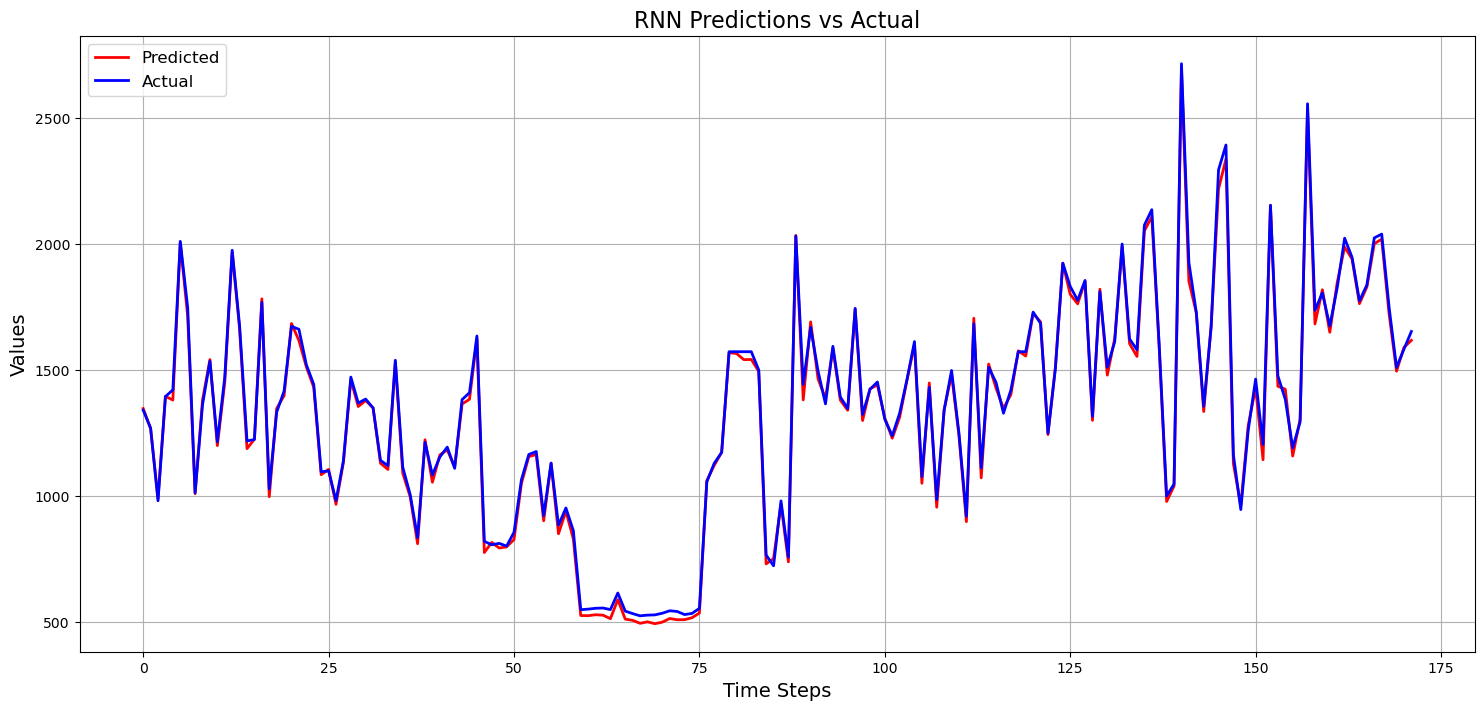

In [36]:
# Set the figure size for better visibility
plt.figure(figsize=(18, 8))

# Plot the RNN predictions and actual values
plt.plot(rnn_preds_actual, color='r', label='Predicted', linewidth=2)
plt.plot(y_test_actual, color='b', label='Actual', linewidth=2)

# Add title and labels
plt.title('RNN Predictions vs Actual', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Display the legend and grid for clarity
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)

# Save the plot with high resolution
plt.savefig('1_RNN.jpg', dpi=200)

# Show the plot
plt.show()


### LSTM

In [39]:
# Inverse transform predictions and actual values
lstm_preds_actual = scaler_y.inverse_transform(LSTM_preds)

# Convert y_test to a NumPy array and reshape it to 2D
y_test_actual = scaler_y.inverse_transform(y_test.values.reshape(-1, 1))  # Use .values to convert to a NumPy array

# Initialize the results dictionary if not already done
results_dict = {}

# Store the evaluation results in the dictionary
results_dict['LSTM'] = evaluate(y_test_actual, lstm_preds_actual)

# Print the evaluation results
print(evaluate(y_test_actual, lstm_preds_actual))


{'MAE': 95.44638539726557, 'RMSE': 131.97777458264508, 'R2': 0.9101803971890717}


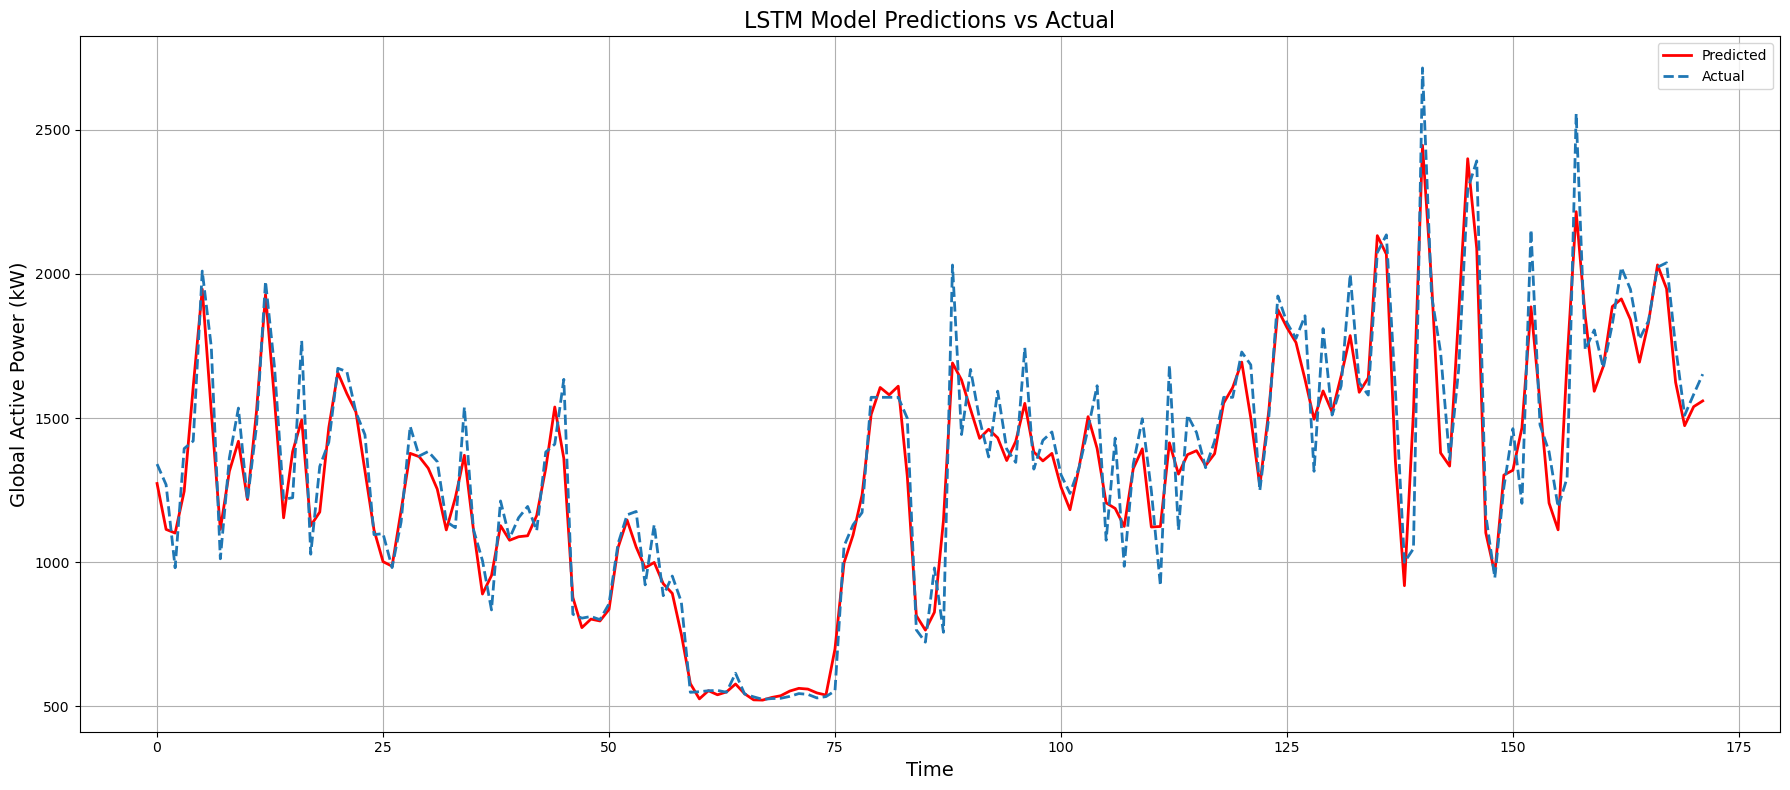

In [40]:
# Plotting the actual vs predicted values for LSTM model
plt.figure(figsize=(18, 8))
plt.plot(lstm_preds_actual, "r-", label="Predicted", linewidth=2)
plt.plot(y_test_actual, label="Actual", linestyle="--", linewidth=2)
plt.title('LSTM Model Predictions vs Actual', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Global Active Power (kW)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to ensure everything fits well
plt.savefig('2 - LSTM.jpg', dpi=200)
plt.show()

### GRU

In [42]:
# Inverse transform predictions and actual values for GRU
gru_preds_actual = scaler_y.inverse_transform(GRU_preds)
y_test_actual = scaler_y.inverse_transform(pd.DataFrame(y_test))

# Initialize the results dictionary if not already done
results_dict = {}

# Store results for evaluation
results_dict['GRU'] = evaluate(y_test_actual, gru_preds_actual)

# Display evaluation results
print(evaluate(y_test_actual, gru_preds_actual))


{'MAE': 42.093409112931575, 'RMSE': 49.25604353423909, 'R2': 0.9874890992984587}


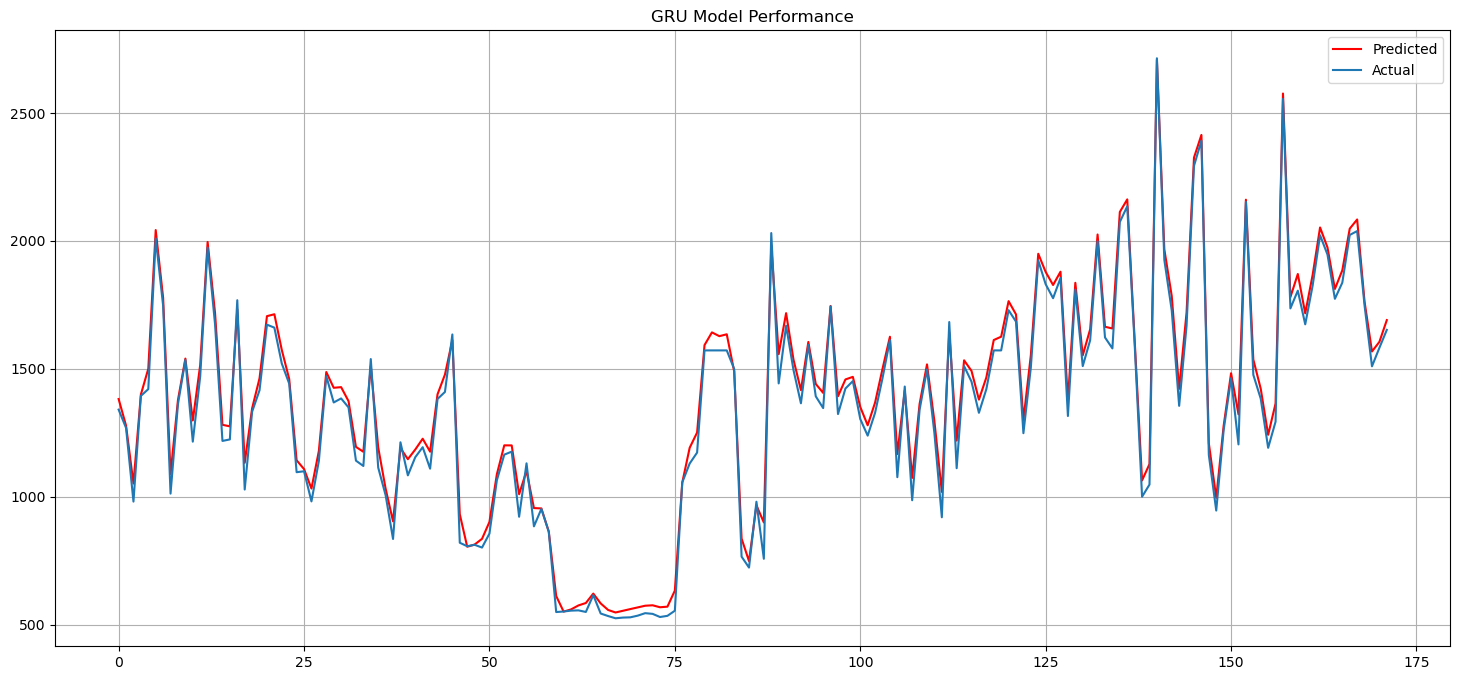

In [43]:
# Plotting the GRU predictions vs actual values
plt.figure(figsize=(18, 8))
plt.plot(gru_preds_actual, "r-", label="Predicted")
plt.plot(y_test_actual, label="Actual")
plt.title('GRU Model Performance')
plt.legend()
plt.grid(True)
plt.savefig('3 - GRU.jpg', dpi=200)
plt.show()